In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df=pd.read_csv('tvmarketing.csv')
df.head()
df.dtypes
df.shape
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


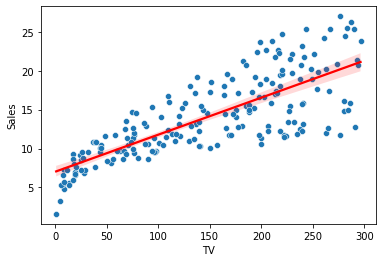

In [3]:

xTrain=df['TV']
yTrain=df['Sales']
# sns.set_style('whitegrid')
sns.scatterplot(x = xTrain,y = yTrain)
sns.regplot(x=xTrain,y=yTrain,color='red',scatter=False)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x=df[['TV']]
y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train.shape
x_test.shape
print(x)

        TV
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
..     ...
195   38.2
196   94.2
197  177.0
198  283.6
199  232.1

[200 rows x 1 columns]


In [5]:

x=df['TV']
y=df['Sales']

x_mean=x.mean()
y_mean=y.mean()

#y=b0+b1x
#b1=sum((xi-x)*(yi-y))/sum(xi-x)^2

b1=sum((x-x_mean)*(y-y_mean))/(sum((x-x_mean)**2))
b0=y_mean-b1*x_mean

def fun(inp):
  ans=[]
  for x in inp:
    pred=b0+b1*x
    ans.append(pred)
  return ans

fun([44.5])




[np.float64(9.14797404839708)]

In [10]:
from sklearn.linear_model import LinearRegression
x=pd.DataFrame(x)
model=LinearRegression()
model.fit(x,y)
print(x)
model.intercept_,model.coef_[0]
model.predict([[44.5]])

        TV
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
..     ...
195   38.2
196   94.2
197  177.0
198  283.6
199  232.1

[200 rows x 1 columns]


/home/user/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.14797405])

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
x=df[['TV']]
y=df['Sales']
model=LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

model.fit(x_train,y_train)
yPred=model.predict(x_test)

mse=mean_squared_error(yPred,y_test)
r2=r2_score(yPred,y_test)
mse

12.652284152988944